In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words = 10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
                           train_data[0]])


In [6]:
train_labels[10]

3

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results
        
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
        return results
    
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

In [11]:
model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 222us/step - loss: 3.8121 - accuracy: 0.0641 - val_loss: 3.7981 - val_accuracy: 0.3530
Epoch 2/20
7982/7982 [==============================] - 1s 105us/step - loss: 3.7883 - accuracy: 0.3141 - val_loss: 3.7773 - val_accuracy: 0.3530
Epoch 3/20
7982/7982 [==============================] - 1s 106us/step - loss: 3.7679 - accuracy: 0.3418 - val_loss: 3.7573 - val_accuracy: 0.3530
Epoch 4/20
7982/7982 [==============================] - 1s 108us/step - loss: 3.7479 - accuracy: 0.3514 - val_loss: 3.7374 - val_accuracy: 0.3530
Epoch 5/20
7982/7982 [==============================] - 1s 100us/step - loss: 3.7282 - accuracy: 0.3379 - val_loss: 3.7180 - val_accuracy: 0.3530
Epoch 6/20
7982/7982 [==============================] - 1s 98us/step - loss: 3.7087 - accuracy: 0.3514 - val_loss: 3.6985 - val_accuracy: 0.3530
Epoch 7/20
7982/7982 [==============================] - 1s 98us/step - loss: 

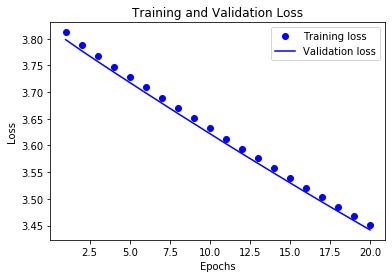

In [22]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

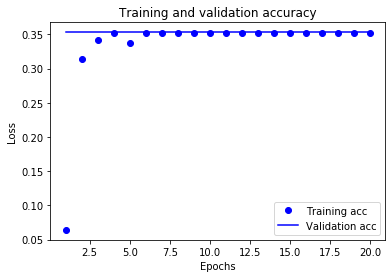

In [23]:
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b" , label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

model.fit(partial_x_train,
         partial_y_train,
         epochs = 9,
         batch_size = 512,
         validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 107us/step - loss: 3.8118 - accuracy: 0.0574 - val_loss: 3.7978 - val_accuracy: 0.3530
Epoch 2/9
7982/7982 [==============================] - 1s 99us/step - loss: 3.7880 - accuracy: 0.3117 - val_loss: 3.7769 - val_accuracy: 0.3530
Epoch 3/9
7982/7982 [==============================] - 1s 100us/step - loss: 3.7676 - accuracy: 0.2551 - val_loss: 3.7569 - val_accuracy: 0.3530
Epoch 4/9
7982/7982 [==============================] - 1s 103us/step - loss: 3.7477 - accuracy: 0.3514 - val_loss: 3.7372 - val_accuracy: 0.3530
Epoch 5/9
7982/7982 [==============================] - ETA: 0s - loss: 3.7284 - accuracy: 0.35 - 1s 107us/step - loss: 3.7280 - accuracy: 0.3514 - val_loss: 3.7177 - val_accuracy: 0.3530
Epoch 6/9
7982/7982 [==============================] - 1s 109us/step - loss: 3.7084 - accuracy: 0.3514 - val_loss: 3.6982 - val_accuracy: 0.3530
Epoch 7/9
7982/7982 [====================

In [25]:
results

[3.6431738243289855, 0.3615316152572632]

In [26]:
predictions = model.predict(x_test)

In [27]:
predictions[0].shape

(46,)

In [28]:
np.sum(predictions[0])

1.0

In [29]:
np.argmax(predictions[0])

1